# Ford GoBike Exploration
## by Jem Chang

## Investigation Overview  

In this analysis, I would like to figure that when and where are most trips taken, and what kind of characteristics are in these locations and time periods. The characteristics include rider's attributes (sex, age, and user_type) and duration of trips.

## Dataset Overview  

This dataset includes 519,700 trips with 15 features such as locations, time, and user attributes. The dataset is subsetted by choosing top 8 trips start stations with the most trips due to the same stations with same amount of trips in the end stations. Also, June's data is removed because of lack of insufficient data in that month. 


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import math
import time

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [10]:
# load in the dataset into a pandas dataframe
df_top8 = pd.read_csv("2017-fordgobike-tripdata-clean.csv")

In [12]:
# convert time period, month, and weekday into ordered categorical types
ordinal_var_dict = {'start_month_char': ['Jul','Aug','Sep','Oct','Nov','Dec'],
                    'period_day': ['morning', 'afternoon', 'night'],
                    'start_weekday_char': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_top8[var] = df_top8[var].astype(ordered_var)

In [22]:
df_cust = df_top8.query('user_type == "Customer"')
df_sub = df_top8.query('user_type == "Subscriber"')

## The top 8 stations with the most trips

All of the start stations with the most trips are in San Francisco and connect to public transportations such as Caltrain, Bart and Ferry.

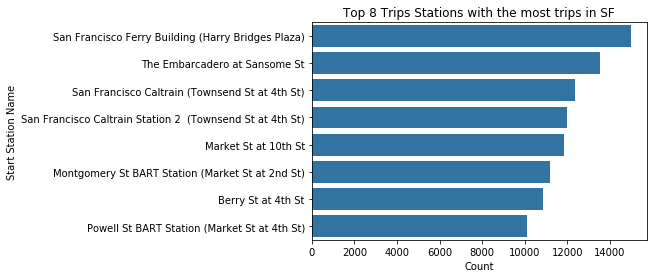

In [34]:
st_stat_counts = df_top8['start_station_name'].value_counts()
st_stat_order = st_stat_counts.index

base_color = sb.color_palette()[0]
sb.countplot(data=df_top8, y='start_station_name', color=base_color, order=st_stat_order)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 8 Trips Stations with the most trips in SF');

## The time with most trips  

* There are the most trips in the morning.    
* There are the most trips during the weekdays than the weekends.   
* The number of trips gradually increases from July to October and decreases in November and December.

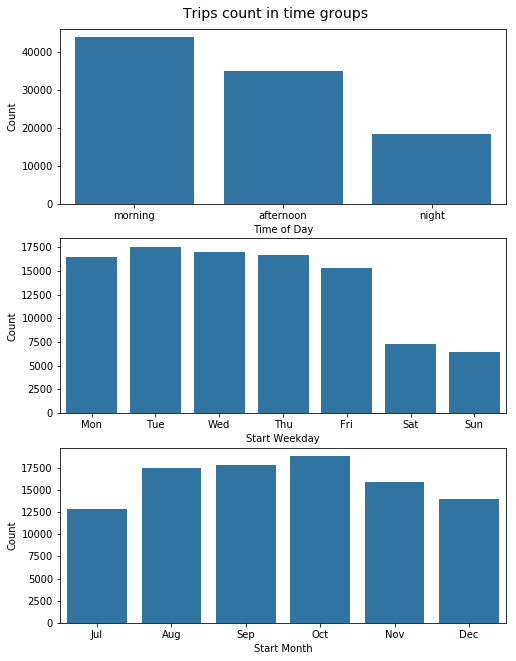

In [64]:
fig, ax = plt.subplots(nrows=3, figsize = [8,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df_top8, x = 'period_day', color = default_color, ax = ax[0])
sb.countplot(data = df_top8, x = 'start_weekday_char', color = default_color, ax = ax[1])
sb.countplot(data = df_top8, x = 'start_month_char', color = default_color, ax = ax[2])
ax[0].set_xlabel('Time of Day')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Start Weekday')
ax[1].set_ylabel('Count')
ax[2].set_xlabel('Start Month')
ax[2].set_ylabel('Count')
plt.subplots_adjust(top=0.95)
fig.suptitle('Trips count in time groups', fontsize=14);

## The top 8 stations with the most trips by weekdays in each user type  
After separating user types, for customers, there are 6 out of 8 stations with the most trips in the weekend. Most of trips happen at Ferry Building and Embarcadero that are very popular tourist attractions. On the other hand, for subscribers, most of trips happen during the weekdays. Subscribers are more likely commuters.

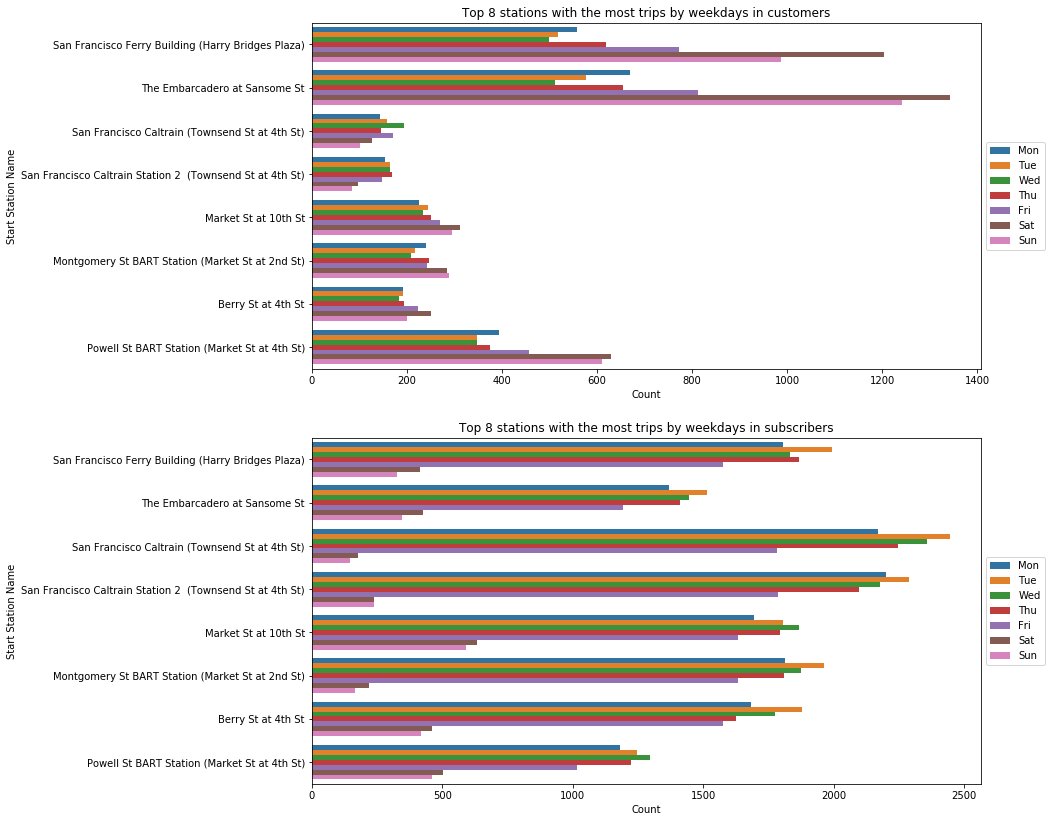

In [35]:
plt.figure(figsize=(12,14))
ax = plt.subplot(211)
sb.countplot(data=df_cust, y='start_station_name', hue='start_weekday_char', order=st_stat_order)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Start Station Name')
plt.xlabel('Count')
plt.title('Top 8 stations with the most trips by weekdays in customers')

ax = plt.subplot(212)
sb.countplot(data=df_sub, y='start_station_name', hue='start_weekday_char', order=st_stat_order)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Start Station Name')
plt.xlabel('Count')
plt.title('Top 8 stations with the most trips by weekdays in subscribers');

## The top 8 stations with the most trips by months in each user type   
The distributions in each month support that customers might include tourists because the most trips happen in August at Ferry Building and Embarcadero. For subscribers, the numbers of trips gradually increase from July to October and decrease in November and December according to the climate changes.

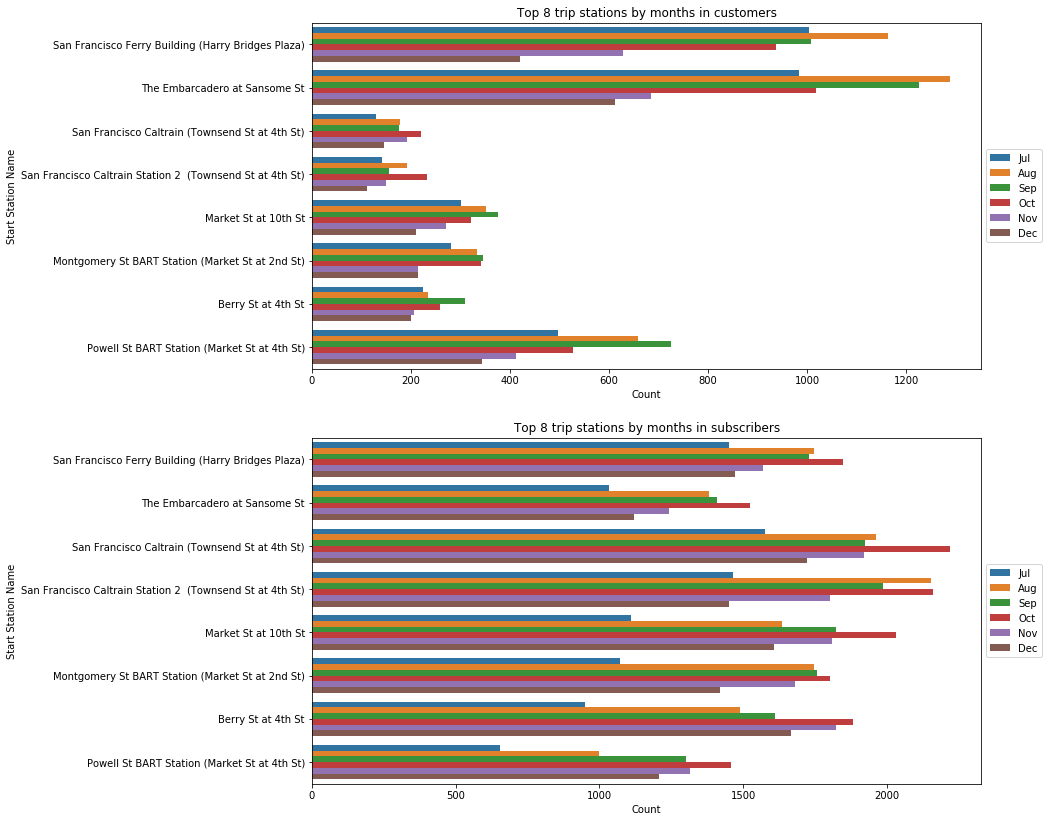

In [36]:
plt.figure(figsize=(12,14))
ax = plt.subplot(211)
sb.countplot(data=df_cust, y='start_station_name', hue='start_month_char', order=st_stat_order)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Start Station Name')
plt.xlabel('Count')
plt.title('Top 8 trip stations by months in customers')

ax = plt.subplot(212)
sb.countplot(data=df_sub, y='start_station_name', hue='start_month_char', order=st_stat_order)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Start Station Name')
plt.xlabel('Count')
plt.title('Top 8 trip stations by months in subscribers');

## The duration of customers' trips by time groups in top 8 stations  
In customers, the duration of trips is longer than subscribers'. The medians fall between 1,000 and 2,000 seconds. The duration of trips at night is longer than in the morning and afternoon which needs to be investigated deeper. The duration of trips in December is longer than in other months. It probably because of holiday seasons such Christmas and New Year. 

<Figure size 432x288 with 0 Axes>

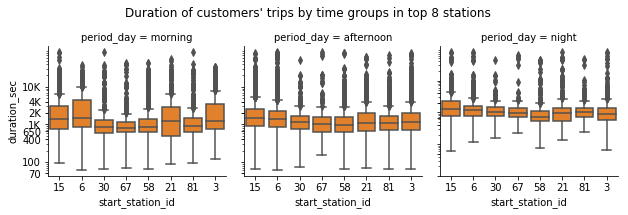

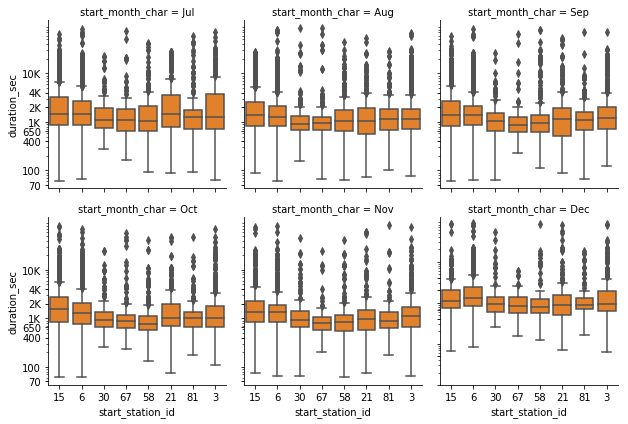

In [67]:
times_chr = ['period_day','start_month_char']
base_color = sb.color_palette()[1]

for i in range(1, 3):
    plt.subplots_adjust(top=0.8)
    g.fig.suptitle('Duration of customers\' trips by time groups in top 8 stations')
    g = sb.FacetGrid(data=df_cust, col=times_chr[i-1], col_wrap=3)
    g.map(sb.boxplot,'start_station_id', 'duration_sec', order=[15,6,30,67,58,21,81,3], color=base_color)
    plt.yscale('log')
    plt.yticks([10,50,100,400,650,1000,2000,4000,10000], [10,70,100,400,650,'1K','2K','4K','10K']);

## The durations of subscribers' trips by time groups in top 8 stations  
For subscribers, the duration of trips is shorter than customers'. The medians of the durations fall around 650 seconds. The trip at night is also longer than the other time of day which needs to be investigated. The trips in December are the longest, which might imply the holiday season's coming. It also needs more data to support.

<Figure size 432x288 with 0 Axes>

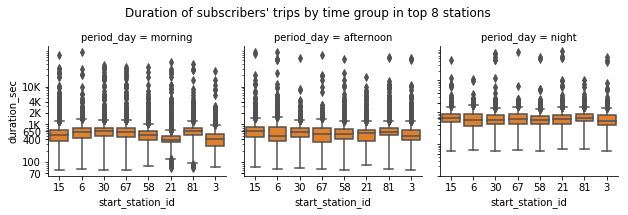

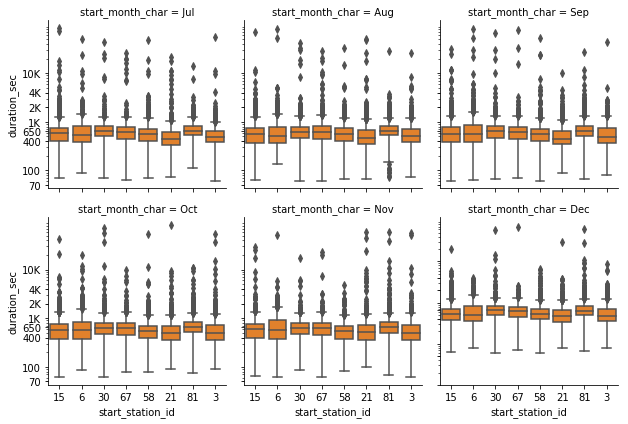

In [70]:
base_color = sb.color_palette()[1]
for i in range(1, 3):
    plt.subplots_adjust(top=0.8);
    g.fig.suptitle('Duration of subscribers\' trips by time group in top 8 stations');
    g = sb.FacetGrid(data=df_sub, col=times_chr[i-1], col_wrap=3);
    g.map(sb.boxplot,'start_station_id', 'duration_sec', order=[15,6,30,67,58,21,81,3], color=base_color);
    plt.yscale('log');
    plt.yticks([10,50,100,400,650,1000,2000,4000,10000], [10,70,100,400,650,'1K','2K','4K','10K']);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

## Summary
All of the most trips happen at the stations in San Francisco. User types play an important role here to impact the number of trips in each time groups. Thus, getting more user types' attributes will help understand the characteristics of trips more and attract higher traffics for this program.  